# Applied Data Science Capstone Project 
###  IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Methodology](#methodology)
    * [Area Studied](#area)
    * [K-Means](#kmeans)
    * [Foursquare Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The city of Tucson is located in the south of the state of Arizona in the United States. It is home of the 33rd largest population in the country, 2nd in its state, spread over 624 km2. Although it stands among the most populated cities, its population density of 888 people/km² is low, meaning that the city buildings are rather scattered over the area than condensed. The city has not grown as much vertically as horizontally, so, tall buildings are not so common. Moreover, the city stands in the Sonoran Desert, so temperatures around 40oC are common during 5 months, every year. 
Moving around the city can be difficult, given the aforementioned conditions. The aim of this project is to provide meaningful information about the density of of venues in different Tucson neighborhoods to provide support for several choices, such as suitable areas to live, depending on one’s need of public transportation, a potential good location for a business, priority areas for an enhancement in public transportation and other matters.  

## Methodology <a name="methodology"></a>

### Area Studied<a name="area"></a>

Neighborhood names were obtained from website: https://www.city-data.com/nbmaps/neigh-Tucson-Arizona.html.
We performed the web scraping as follows:

In [2]:
#Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [3]:
url = 'https://www.city-data.com/nbmaps/neigh-Tucson-Arizona.html'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

Using the "Inspect" tool, we found the names of neighborhoods are under the class "street-name", so, we extracted them as follows:

In [4]:
list_neigh = soup.find_all('span', class_ = 'street-name')
neighborhood = []
for item in list_neigh:
    neighborhood.append(item.text)
print(neighborhood)

['12th Avenue - Valencia Road', 'Armory Park', 'Avondale', 'Barrio Viejo', 'Central', 'Civano', 'Congress Street', 'Convention', 'Cragin-Keeling', 'Downtown', 'Eastside', 'El Encanto', 'El Presidio', 'Fairgrounds', 'Fourth Avenue', 'Menlo Park', 'Northwest', 'Old Fort Lowell', 'Old Pascua', 'Pullman', 'Sam Hughes', 'Santa Cruz Southwest', 'South Tucson', 'Sunnyside', 'University of Arizona Campus', 'Western Hills', 'Winter-haven']


Then, we obtained the neighborhoods' geographic coordinates: 

In [5]:
#Import libraries
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library


In [6]:
def findlatlon(add):
    coord=[]
    address = add + ', Tucson, AZ'
    #address = 'Armory Park, Tucson, AZ'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if location == None:
        coord == 'Not located'
    else:
        latitude = location.latitude
        longitude = location.longitude
        coord=[latitude,longitude]
    return coord


And stored them in a dataframe:

In [7]:
coordinates = []
for item in neighborhood:
    coordinates.append(findlatlon(item))
    
df_tus = pd.DataFrame(columns = ['Neighborhood','Latitude','Longitude'])  #creates the dataframe

for item in neighborhood:
    ind = neighborhood.index(item)
    neigh = item
    if (coordinates[ind]) == []:  # Writes zero where there's no info of lat lon
        lat = 0
        lon = 0
    else:
        lat = coordinates[ind][0]
        lon = coordinates[ind][1]
    df_tus = df_tus.append({'Neighborhood':neigh, 'Latitude':lat, 'Longitude':lon},ignore_index=True)


In [8]:
df_tus.head()

,Neighborhood,Latitude,Longitude
0,12th Avenue - Valencia Road,0,0
1,Armory Park,32.2153,-110.966
2,Avondale,0,0
3,Barrio Viejo,32.2142,-110.973
4,Central,32.2271,-110.972


As seen in the dataframe, some neighborhoods have no coordinates information in the geolocator, so we dropped them. 

In [9]:
df1 = df_tus.replace(0, np.nan)
df_tus = df1.dropna(how='any', axis=0)
df_tus.reset_index(drop= True, inplace = True)
df_tus

,Neighborhood,Latitude,Longitude
0,Armory Park,32.215319,-110.965879
1,Barrio Viejo,32.214224,-110.973130
2,Central,32.227055,-110.971783
3,Civano,32.147808,-110.764803
4,Congress Street,32.222333,-110.966709
5,Convention,32.218581,-110.974439
6,Downtown,32.215691,-110.962312
7,Eastside,32.236059,-110.830288
8,El Encanto,32.241355,-110.848053
9,El Presidio,32.225158,-110.976240


In [10]:
df_tus.drop(df_tus.index[[20]], inplace = True)

C:\Users\cicap\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df_tus.reset_index(drop= True, inplace = True)
df_tus 

,Neighborhood,Latitude,Longitude
0,Armory Park,32.215319,-110.965879
1,Barrio Viejo,32.214224,-110.973130
2,Central,32.227055,-110.971783
3,Civano,32.147808,-110.764803
4,Congress Street,32.222333,-110.966709
5,Convention,32.218581,-110.974439
6,Downtown,32.215691,-110.962312
7,Eastside,32.236059,-110.830288
8,El Encanto,32.241355,-110.848053
9,El Presidio,32.225158,-110.976240


We could then plot the neighborhood locations on a map:

In [12]:
#First find city's central coordinates:

address = 'Tucson, AZ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitudec = location.latitude
longitudec = location.longitude
print(latitudec, longitudec)

32.2228765 -110.9748477


In [13]:
#Then plot the map
map_tucson_ng = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_tus['Latitude'], df_tus['Longitude'], df_tus['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  

map_tucson_ng

The map shows us that there are 13 neighborhoods scattered around the city and 8 neighborhoods close to each other on the central area. As we wanted to analyze neighborhoods distant enough so there is no data overlap, we performed a K-Means clusterization to group the neighborhoods that are close together. We already know the number of clusters we wanted (14), so we did not perform the elbow or silhouette metrics to chose the best number of clusters, because it was unnecessary in our case. 

### K-Means <a name="kmeans"></a>

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib import cm

We created a dataframe with only latitude and longitude to input the model:

In [15]:
number_clusters = 14
latlon = df_tus.drop(['Neighborhood'], axis = 'columns')
modelo = KMeans(n_clusters = number_clusters, random_state = 300)
cneigh = modelo.fit(latlon)

In [16]:
clusters = modelo.fit_predict(latlon)
centers = modelo.cluster_centers_

In [17]:
clst = [*range(0,number_clusters)]
df_clst = pd.DataFrame(centers, columns = ['Lat','Lon']) 
df_clst.insert(2, 'Cluster', clst)
df_clst

,Lat,Lon,Cluster
0,32.236059,-110.830288,0
1,32.217848,-110.987383,1
2,32.044750,-110.712940,2
3,32.147808,-110.764803,3
4,32.260881,-110.886013,4
5,32.216892,-110.967007,5
6,32.143406,-110.945758,6
7,32.271535,-110.927806,7
8,32.232136,-110.943201,8
9,32.248409,-110.984259,9


The cursterized neighborhoods can be seen on the map:

In [18]:
map_tucson_ng = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_tus['Latitude'], df_tus['Longitude'], df_tus['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  


for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  

map_tucson_ng

### Foursquare Data<a name="data"></a>

In [19]:
CLIENT_ID = 'KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX' # your Foursquare ID
CLIENT_SECRET = 'CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA' # your Foursquare Secret
ACCESS_TOKEN = "2AP4OUHY5DDCDQ4TRHOATIJOV5JZ2MO4BY2WJX01FCKDWQ0O" # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX
CLIENT_SECRET:CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA


We got the information of venues from Foursquare and saved them in CSV files so we could access them later without the need to make requests from API. Several requests were made, using different radius for each search. The values of radius were: 3000m, 1000m, 500m and 100m for each cluster centroid.

In [20]:
results_lista = [] 
radius = 3000

for index in df_clst.index:
    latitude = df_clst['Lat'][index]
    longitude = df_clst['Lon'][index]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    results_lista.append(requests.get(url).json())    

In [239]:
venues_total = pd.DataFrame(columns = ['IDN','ID','Name','Categories','CatID','Lat','Lon','Distance'])
indneig = 0   # index of neighborhood (after clustering)
for item in results_lista:   #for within neighborhoods
    venues = (item['response']['venues'])
    for item2 in venues:   #for within venues
        ID = item2['id']
        Name = item2['name']
        Cat = item2['categories']
        Lati = item2['location']['lat']
        Long = item2['location']['lng']
        Dist = item2['location']['distance']
        try:
            Cat1 = item2['categories'][0]['name']
            Catid = item2['categories'][0]['id']
        except:
            Cat1 = "NaN"
            Catid ="NaN"
        venues_total = venues_total.append({'IDN':indneig,'ID':ID, 'Name':Name,'Categories':Cat1,'CatID':Catid,'Lat':Lati,'Lon':Long,'Distance':Dist},ignore_index=True)
    indneig = indneig+1 


Then, stored the results in a dataframe containing venues information and index of clusterized neighborhoods.

In [240]:
venues_total.head()

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance
0,0,4ee8f11993ad8b68ea0ab7f7,Ward 2 Office,City Hall,4bf58dd8d48988d129941735,32.236048,-110.830434,13
1,0,4d9c8e6e83f36ea8a9dca394,Christian Care Tucson,Residential Building (Apartment / Condo),4d954b06a243a5684965b473,32.221326,-110.817736,2021
2,0,4cc4c137be40a35d7d93804c,Quilters Market,Hobby Shop,4bf58dd8d48988d1fb941735,32.235881,-110.830018,32
3,0,4ea9951e6c253859bb722aed,Pantano Wash Launromat,Building,4bf58dd8d48988d130941735,32.236218,-110.829767,52
4,0,4e13b19314951daa08a484c5,Eastside City Hall,NaN,NaN,32.236326,-110.831156,86


In [241]:
venues_total.to_csv('Venues_R3000_v2.csv')

Then we joined all searches in the same dataframe:

In [21]:
df1 = pd.read_csv('Venues_R3000_v2.csv')
df2 = pd.read_csv('Venues_R1000_v2.csv')
df3 = pd.read_csv('Venues_R500_v2.csv')
df4 = pd.read_csv('Venues_R100_v2.csv')
frames = [df1,df2, df3, df4]
df_total = pd.concat(frames, sort=False)
df_total.drop(df_total.columns[[0]],axis = 1,inplace = True)

We got rid of duplicated rows using:

In [22]:
df_total = df_total.drop_duplicates(subset=None,keep='first')

We saved category data for further analyzis, but it wasn't used in this work, so we dropped the columns related to it 

In [23]:
df_total = df_total.drop(['ID','CatID','Categories','Name'], axis = 'columns')
df_total

,IDN,Lat,Lon,Distance
0,0,32.236048,-110.830434,13
1,0,32.221326,-110.817736,2021
2,0,32.235881,-110.830018,32
3,0,32.236218,-110.829767,52
4,0,32.236326,-110.831156,86
...,...,...,...,...
1617,13,32.175140,-110.968523,7672
1618,13,32.243661,-110.971873,657
1619,13,32.245800,-110.971366,640
1620,13,32.250615,-110.963066,757


## Analysis <a name="analysis"></a>

We plotted all the venues around its neighborhoods:

In [39]:
map_tucson_venues = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_total['Lat'], df_total['Lon'], df_total['IDN']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  
for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup('N'+ str(label+1), parse_html=True)
    #label = folium.Popup(str(poi) + ' Neighborhood ' + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  


map_tucson_venues

As we can see, the neighborhoods on the south of the city presented a lower venue density than the neighborhoods on the noth and central parts, but we calculated the metrics, so we were able to quantify it.

In [25]:
average = []
std_dev = []
for location in clst:
    filter1 = df_total["IDN"]== location
    fil = df_total.where(filter1, inplace = False)
    stats = fil.describe()  
    average.append(stats['Distance'][1])
    std_dev.append(stats['Distance'][2])


In [26]:
df_metrics = pd.DataFrame(average, columns =['Average'])
df_metrics.insert(1,'Standard_Deviation', std_dev)

df_metrics

,Average,Standard_Deviation
0,617.277778,1280.986819
1,613.016260,391.900204
2,2679.390000,3756.273309
3,2302.896000,2485.533281
4,701.938272,1261.607153
5,409.258065,316.023022
6,1245.816667,624.615027
7,727.702479,615.887526
8,455.008264,900.703350
9,720.198347,1170.539802


In [40]:
# Define labels, positions, bar heights and error bar heights
labels = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14']
x_pos = np.arange(len(labels))
CTEs = average
error = std_dev

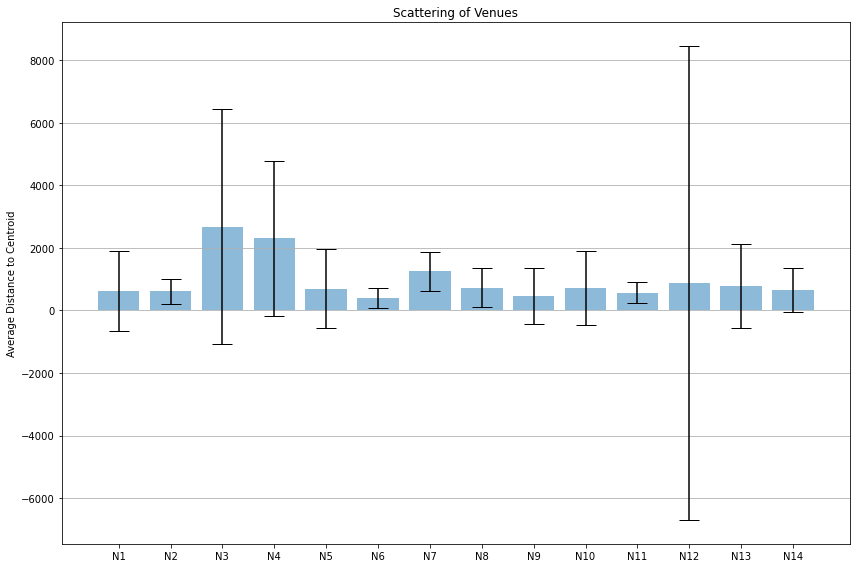

In [41]:
# Build the plot
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 8]
#plt.figure(figsize=(30, 3))
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average Distance to Centroid')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Scattering of Venues')
ax.yaxis.grid(True)

plt.rcParams['figure.figsize'] = [12, 8]
# Save the figure and show
#plt.figure(figsize=(30, 3))
#plt.figure(figsize=(20,8))
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

### We them clusterized the neighborhoods:

Finding the optimal number of clusters using elbow and silhouette methods:

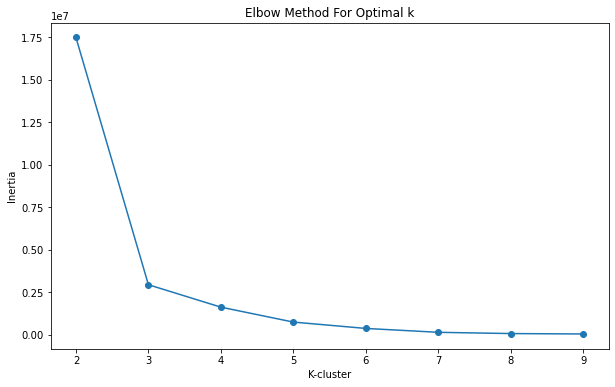

In [27]:
# Lista de valores de K
Kclusters = range(2, 10)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Kclusters:
    modelo = KMeans(n_clusters = K, random_state = 100)
    modelo.fit(df_metrics)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Kclusters, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7282591336746389
For n_clusters = 3 The average silhouette_score is : 0.7075788552895043
For n_clusters = 4 The average silhouette_score is : 0.48112621781372494
For n_clusters = 5 The average silhouette_score is : 0.4124378056549441
For n_clusters = 6 The average silhouette_score is : 0.41571399285979116
For n_clusters = 7 The average silhouette_score is : 0.4227671849054561
For n_clusters = 8 The average silhouette_score is : 0.40475567213073627
For n_clusters = 9 The average silhouette_score is : 0.36962331997667164


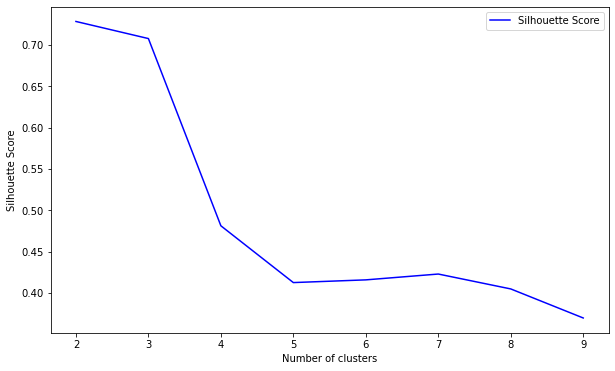

In [28]:
#range_n_clusters = [2, 3, 4, 5, 6,7,8]
range_n_clusters = range(2, 10)
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=100)
    cluster_labels = clusterer.fit_predict(df_metrics)
   #Finding the average silhouette score
    silhouette_avg = silhouette_score(df_metrics, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
fig = plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

After analyzing the elbow and silhouette plots, we decided that 3 clusters is a good choice. The clusterized neighborhoods are presented in the discussion section.

In [42]:
modelo = KMeans(n_clusters = 3, random_state = 100)
cneigh = modelo.fit(df_metrics)

In [43]:
clusters = modelo.fit_predict(df_metrics)
centers = modelo.cluster_centers_


In [44]:
df_clst2 = df_clst.copy()
#df_clst2 = df_clst2.drop(['Cluster'], axis = 'columns')
df_clst2.insert(2, 'Cluster2', clusters)
df_clst2

,Lat,Lon,Cluster2,Cluster
0,32.236059,-110.830288,0,0
1,32.217848,-110.987383,0,1
2,32.044750,-110.712940,2,2
3,32.147808,-110.764803,2,3
4,32.260881,-110.886013,0,4
5,32.216892,-110.967007,0,5
6,32.143406,-110.945758,0,6
7,32.271535,-110.927806,0,7
8,32.232136,-110.943201,0,8
9,32.248409,-110.984259,0,9


## Results and Discussion <a name="results"></a>

In [52]:
map_clusters = folium.Map(location=[latitudec, longitudec], zoom_start=10)

rainbow = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'purple', 5:'orange', 6:'white', 7:'black', 8:'pink', 9:'turquoise'}

# add markers to map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clst2['Lat'], df_clst2['Lon'], df_clst2['Cluster'], df_clst2['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
df_metrics.insert(2,'Cluster', df_clst2['Cluster2'])
grouped = df_metrics.groupby('Cluster').agg(np.mean)
grouped

,Average,Standard_Deviation
Cluster,,
0,680.941229,814.536172
1,874.918699,7572.623958
2,2491.143000,3120.903295


In [62]:
# Define labels, positions, bar heights and error bar heights
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
x_pos = np.arange(len(labels))
#CTEs = average
CTEs = grouped['Average']
#error = std_dev
error = grouped['Standard_Deviation']

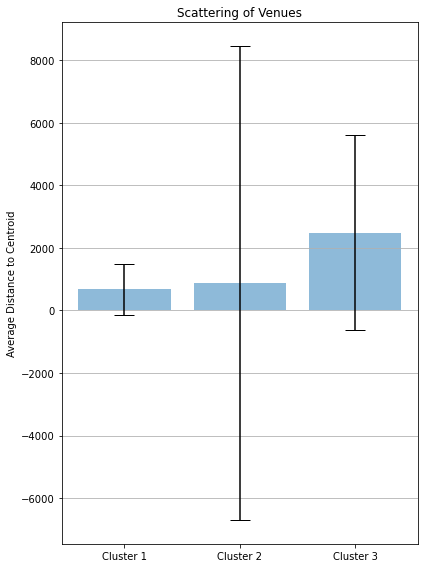

In [63]:

# Build the plot
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [6, 8]
#plt.figure(figsize=(30, 3))
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average Distance to Centroid')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Scattering of Venues')
ax.yaxis.grid(True)

plt.rcParams['figure.figsize'] = [6, 8]
# Save the figure and show
#plt.figure(figsize=(30, 3))
#plt.figure(figsize=(20,8))
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


It is clear from the figure above that neighborhoods in Cluster 1 presented a higher density of venues, so people who choose to live in them will have a range of venues in a walking or biking distance. Average distance to venues is around 680 m, whith a standard deviation of 814, meaning the neigborhoods are close together and there aren't venues very far away. 

In the other hand, Cluster 3 presented a low density of venues. That means a person needs to travel long distances to get to service building, schools, shops, restaurants and recreational sites. This implies that individuals who chose to live in those areas probably have their own means of transportation. These might also be suitable areas for opening delivery business.   

Interestingly, Cluster 2 presented average distance (875 m) not so difference from Cluster 1, but the standard deviation is the highest from all clusters (7572 m), indicating the presence of possible outliers. 

## Conclusion <a name="conclusion"></a>

We identified how venue density is geographically spread over the city. There were three main cluster conformations: low mean and low standard deviation, low mean and very high standard deviation and high mean and high standard deviation. 

The first configuration describes venues that are near each other and in a homogeneous manner. The second describes venues that are mostly close to each other, but some relevant venues located very distant from the center. The third configuration describe venues that are spread apart.  

For further analysis, we recommend to identify and treat the outlier venues, deciding carefully wether these venues should be included or not based on their relevancy. Moreover, we recommend to include venues cathegory to further understand the geographical distribution of venues within the city and with that, provide information support for better decisions regarding this issue.